**Корректность проверена на Python 3.6:**
+ numpy 1.15.4
+ matplotlib 3.0.2
+ pandas 0.23.4
+ seaborn 0.9.0
+ sklearn 0.20.2

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Sklearn (Версия Python 3)

## sklearn.datasets

документация: http://scikit-learn.org/stable/datasets/

In [6]:
from sklearn import datasets

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация выборок

**Способы генерации данных:** 
* make_classification
* make_regression
* make_circles
* make_checkerboard
* etc

#### datasets.make_circles

In [24]:
circles = datasets.make_circles()

In [52]:
print("features: {}".format(circles[0][:5]))
print("target: {}".format(circles[1][:5]))

features: [[-0.72896863  0.68454711]
 [ 0.63742399 -0.77051324]
 [ 0.34062343 -0.72386164]
 [ 0.42577929 -0.90482705]
 [ 0.74382119  0.29449964]]
target: [0 0 1 0 1]


In [54]:
from matplotlib.colors import ListedColormap

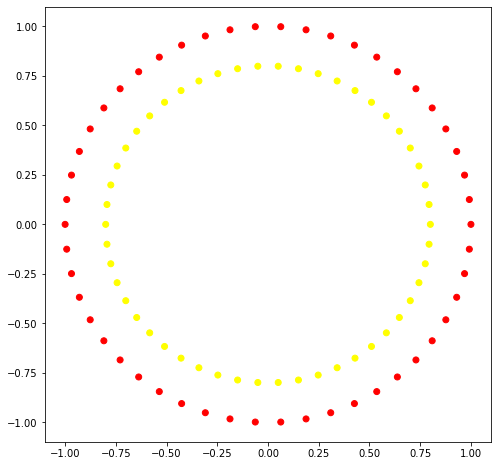

In [55]:
colors = ListedColormap(['red', 'yellow'])

pyplot.figure(figsize(8, 8))
pyplot.scatter(list(map(lambda x: x[0], circles[0])), list(map(lambda x: x[1], circles[0])), c = circles[1], cmap = colors)

In [56]:
def plot_2d_dataset(data, colors):
    pyplot.figure(figsize(8, 8))
    pyplot.scatter(list(map(lambda x: x[0], data[0])), list(map(lambda x: x[1], data[0])), c = data[1], cmap = colors)

In [57]:
noisy_circles = datasets.make_circles(noise = 0.15)

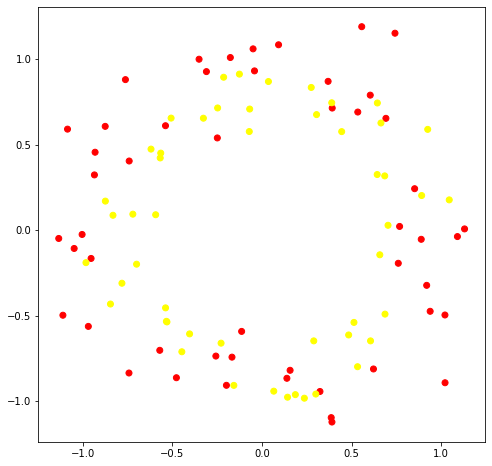

In [58]:
plot_2d_dataset(noisy_circles, colors)

#### datasets.make_classification

In [59]:
simple_classification_problem = datasets.make_classification(n_features = 2, n_informative = 1, 
                                                            n_redundant = 1, n_clusters_per_class = 1,
                                                            random_state = 1 )

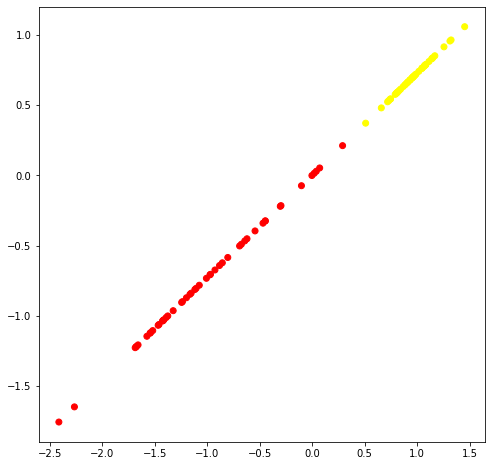

In [60]:
plot_2d_dataset(simple_classification_problem, colors)

In [61]:
classification_problem = datasets.make_classification(n_features = 2, n_informative = 2, n_classes = 4, 
                                                      n_redundant = 0, n_clusters_per_class = 1, random_state = 1)

colors = ListedColormap(['red', 'blue', 'green', 'yellow'])

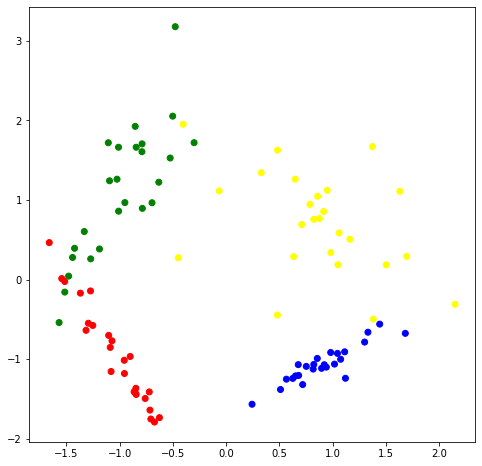

In [62]:
plot_2d_dataset(classification_problem, colors)

### "Игрушечные" наборы данных

**Наборы данных:** 
* load_iris 
* load_boston
* load_diabetes
* load_digits
* load_linnerud
* etc

#### datasets.load_iris

In [63]:
iris = datasets.load_iris()

In [64]:
iris.data[:5], iris.target[:5]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0]))

In [65]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [66]:
print("feature names: {}".format(iris.feature_names))
print("target names: {names}".format(names = iris.target_names))

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names: ['setosa' 'versicolor' 'virginica']


In [67]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [69]:
iris.target[:5]

array([0, 0, 0, 0, 0])

### Визуализация выбокри

In [70]:
from pandas import DataFrame

In [73]:
iris_frame = DataFrame(iris.data)
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target

In [25]:
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [74]:
iris_frame.target = iris_frame.target.apply(lambda x : iris.target_names[x])

In [75]:
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


array([[<AxesSubplot:title={'center':'sepal length (cm)'}>]], dtype=object)

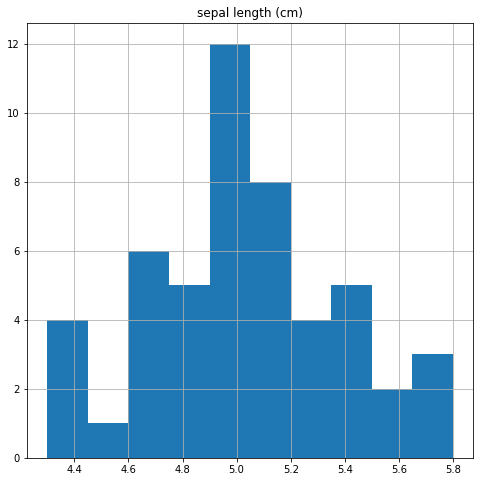

In [76]:
iris_frame[iris_frame.target == 'setosa'].hist('sepal length (cm)')

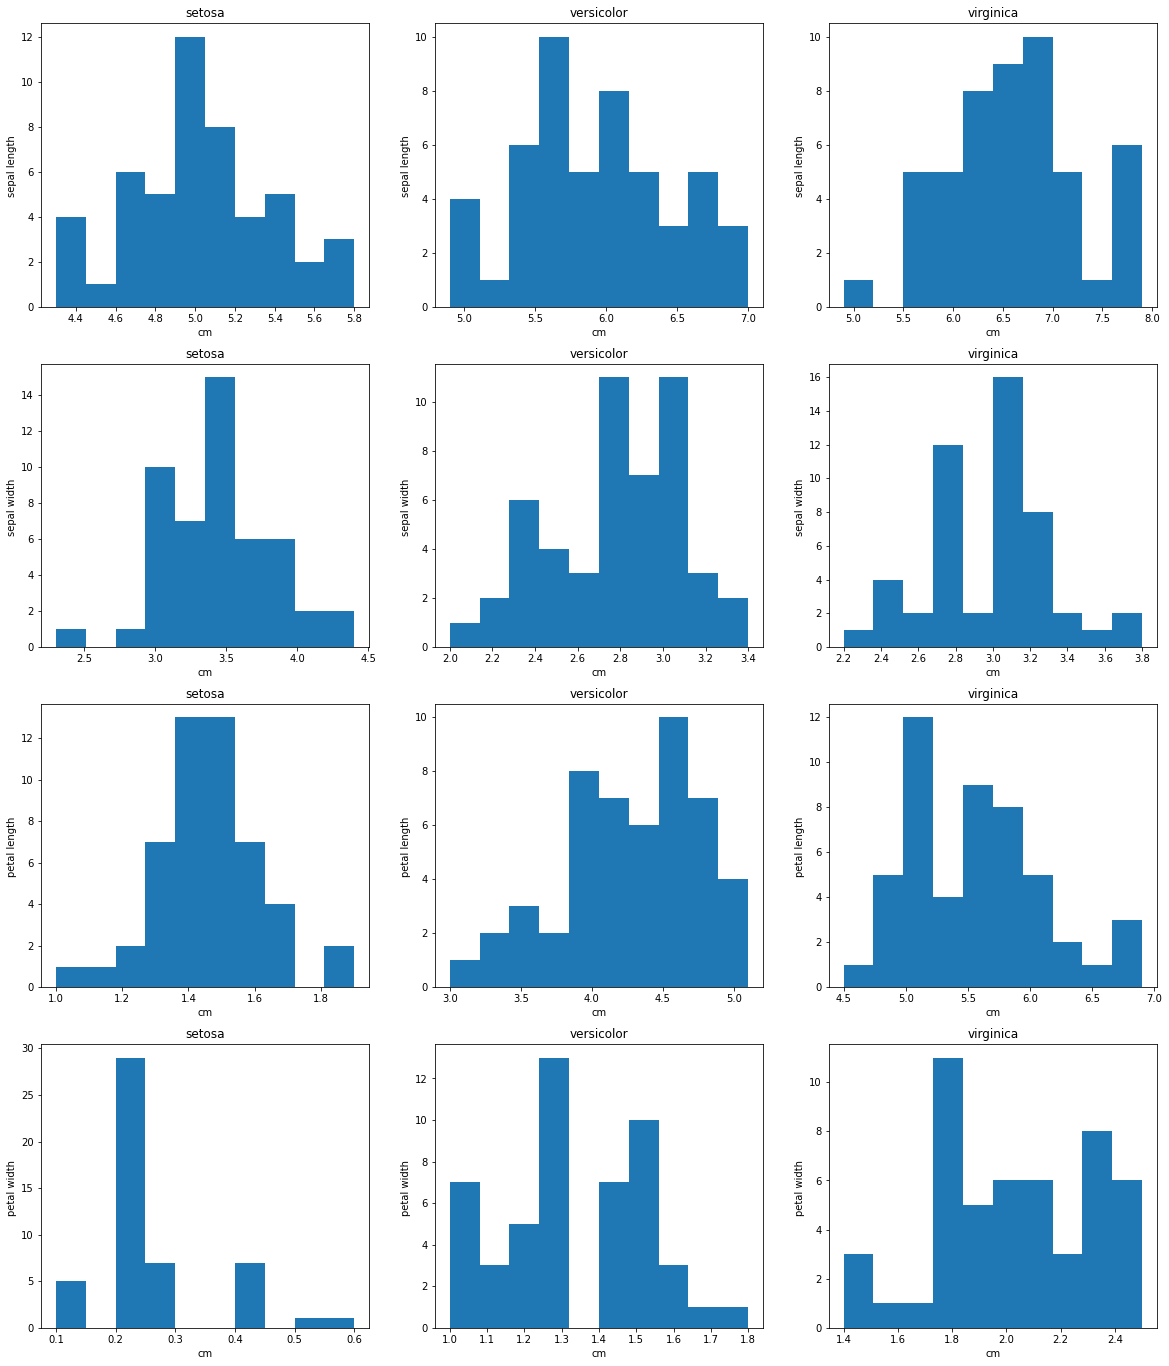

In [77]:
pyplot.figure(figsize(20, 24))

plot_number = 0
for feature_name in iris['feature_names']:
    for target_name in iris['target_names']:
        plot_number += 1
        pyplot.subplot(4, 3, plot_number)
        pyplot.hist(iris_frame[iris_frame.target == target_name][feature_name])
        pyplot.title(target_name)
        pyplot.xlabel('cm')
        pyplot.ylabel(feature_name[:-4])

### Бонус: библиотека seaborn

In [78]:
import seaborn as sns

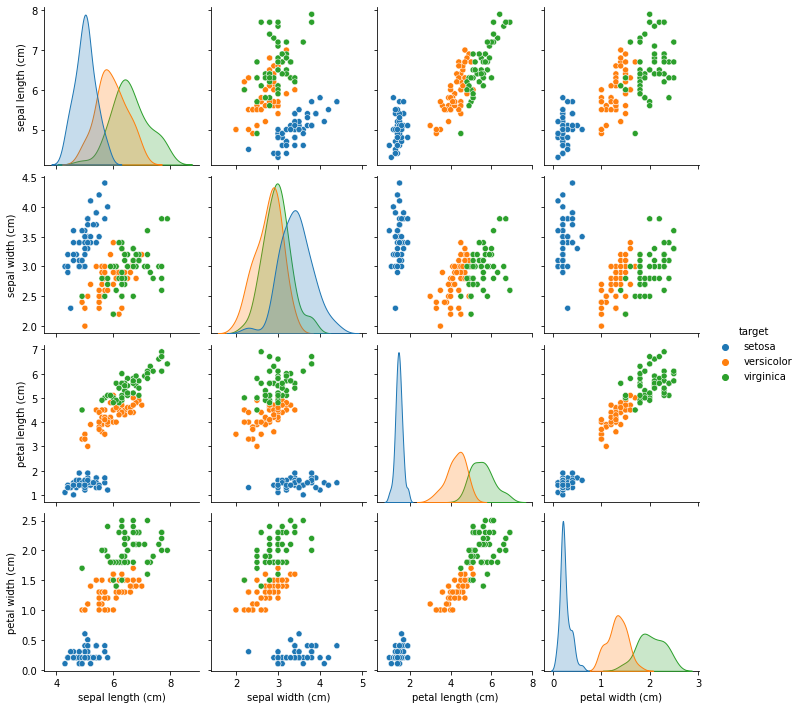

In [79]:
sns.pairplot(iris_frame, hue = 'target')

In [80]:
?sns.set()

Object `sns.set()` not found.


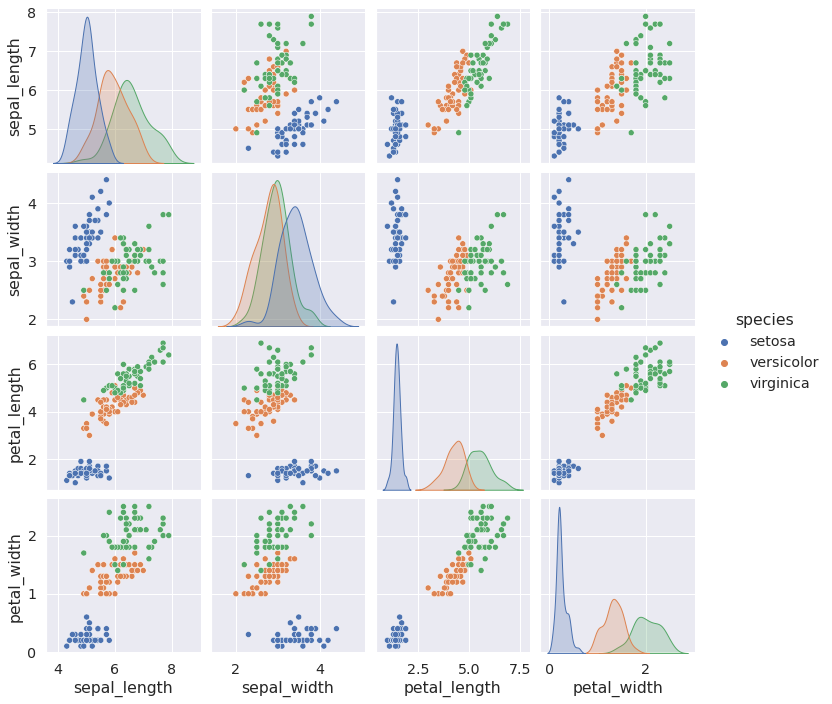

In [81]:
sns.set(font_scale = 1.3)
data = sns.load_dataset("iris")
sns.pairplot(data, hue = "species")

#### **Если Вас заинтересовала библиотека seaborn:**
* установка: https://stanford.edu/~mwaskom/software/seaborn/installing.html
* установка c помощью анаконды: https://anaconda.org/anaconda/seaborn
* руководство: https://stanford.edu/~mwaskom/software/seaborn/tutorial.html
* примеры: https://stanford.edu/~mwaskom/software/seaborn/examples/